# Forest Cover Type Analysis

## by Justin Sierchio

In this analysis, we will be looking at forest cover measurements in Roosevelt National Forest in Colorado. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What types forest cover are there?</li>
    <li>Can we predict where forest fires might occur?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/uciml/forest-cover-type-dataset/download. More information related to the dataset can be found at: https://www.kaggle.com/uciml/forest-cover-type-dataset.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_FOREST = pd.read_csv("covtype.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from SBA dataset
df_FOREST.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


This dataset contains columns describing such features as soil type, wilderness area type, shadow coverage, location to landmarks, cover type, horizontal and vertical distance to hydrology, slope, aspect and elevation.

Specifically, here is what each of the data columns represent.

<ul>
    <li>Elevation = Elevation [m]</li>
    <li>Aspect = Aspect [deg azimuth] </li>
    <li>Slope = Slope [deg]</li>
    <li> Horizontal_Distance_To_Hydrology = self-explanatory</li>
    <li> Vertical_Distance_To_Hydrology = self-explanatory</li>
    <li> Horizontal_Distance_To_Roadways = self-explanatory</li>
    <li> Hillshade_9am = Hill shade index @ 9am on summer solstice [0 to 255]</li>
    <li> Hillshade_Noon = Hill shade index @ 12pm on summer solstice [0 to 255] </li>
    <li> Hillshade_3pm = Hill shade index @ 3pm on summer solstice [0 to 255] </li>
    <li> Horizontal_Distance_To_Fire_Point = self-explanatory</li>
    <li> Wilderness_Area1-4 = (1) Rawah Wilderness Area (2) Neota Wilderness Area (3) Comanche Peak Wilderness Area (4) Cache la Poudre Wilderness Area</li>
    <li> Soil_Type1 to Soil_Type40 = self-explanatory</li>
    <li> Cover_TypeForest = (1) Spruce/Fir (2) Lodgepole Pine (3) Ponderosa Pine (4) Cottonwood/Willow (5) Aspen (6) Douglas-fir (7) Krummholz</li>

## Data Cleaning

Now let's look at the data to see if we need to do any data cleaning.

In [4]:
# Display the basic data info.
print(df_FOREST.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Let's check to make sure there is no null data.

In [5]:
# Check for 'NULL' values
df_FOREST.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


It appears that the data is complete. Now let's look at the distribution of the data.

In [6]:
# Investigate data distribution
df_FOREST.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


From the result here, we may have to scale data later when we use a classificaiton algorithm. Otherwise, the data is complete, all numerically coded and relatively only slightly skewed in some cases.

Now let's check if the data is skewed toward low or high values.

In [7]:
# Check Skewness of Data
df_FOREST_skewness = df_FOREST.skew()
df_FOREST_skewness

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

It appears that the majority of the data is skewed right (given all the positive values). Let's attempt to plot this on a graph.

Text(0.5, 1.0, 'Feature Skewness')

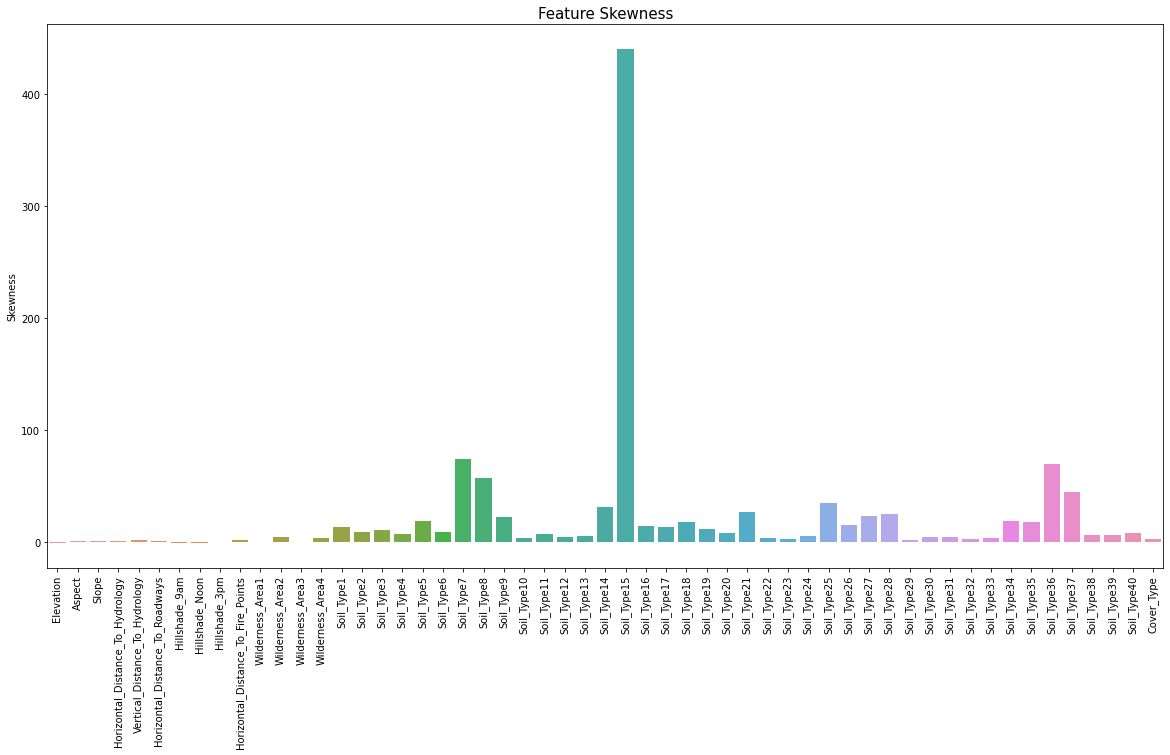

In [8]:
# Plot Skewness

# Create new Skewnewss DataFrame
df_FOREST_skew = pd.DataFrame(df_FOREST_skewness, index=None, columns=['Skewness'])

# Plot Skewness for each Variable
plt.figure(figsize=(20,10))
sns.barplot(x=df_FOREST_skew.index, y='Skewness', data=df_FOREST_skew)
plt.xticks(rotation=90)
plt.title('Feature Skewness',fontsize=15)

Several variables appear to have high skewness, especially Soil_Type_15. To wrap up this section, let's group together some of these variables into separate feature sets.

In [9]:
# Create new feature sets
df_FOREST_features = df_FOREST.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
df_FOREST_soiltype = df_FOREST.loc[:,'Soil_Type1':'Soil_Type40']
df_FOREST_wilderness = df_FOREST.loc[:,'Wilderness_Area1':'Wilderness_Area4']

## Data Analysis

At this juncture, in order to answer our questions of what kind of forest-cover there are and where, we need to get a sense of elevation and distance to water. Theoretically, the further the distance to water and the greater the elevation, the greater the likelihood of the area being prone to forest fires.

Let's use the Elevation and Distance to Hydrology to create a scatter plot.

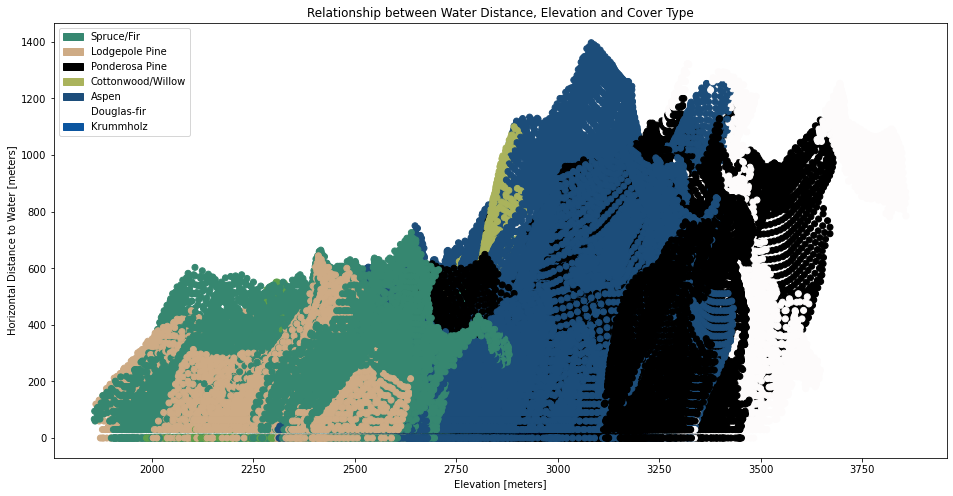

In [10]:
# Create a Scatter plot to look at Elevation and Distance to Hydrology
plt.figure(figsize=(16,8))
plt.scatter(df_FOREST_features["Elevation"], df_FOREST_features["Horizontal_Distance_To_Hydrology"],c=df_FOREST["Cover_Type"],cmap="gist_earth")
plt.title('Relationship between Water Distance, Elevation and Cover Type')

# Label the Scatter plot
import matplotlib.patches as mpatches
pop_a = mpatches.Patch(color='#368770', label='Spruce/Fir')
pop_b = mpatches.Patch(color='#CEAB85', label='Lodgepole Pine')
pop_c = mpatches.Patch(color='#000000', label='Ponderosa Pine')
pop_d = mpatches.Patch(color='#AAB35C', label='Cottonwood/Willow')
pop_e = mpatches.Patch(color='#1C4D7A', label='Aspen')
pop_f = mpatches.Patch(color='#FFFFFF', label='Douglas-fir')
pop_g = mpatches.Patch(color='#0b559f', label='Krummholz')
plt.xlabel('Elevation [meters]')
plt.ylabel('Horizontal Distance to Water [meters]')
plt.legend(handles=[pop_a, pop_b, pop_c, pop_d, pop_e, pop_f, pop_g])
plt.show()

Based upon our best guess, it appears that among the 7 types of forest cover we have, Aspen trees and Ponderosa pines are the tree-types that are most fire-prone. 

Now let's look and see if we can determine some other relationships among the data.

In [11]:
# Create a Feature Set for Future Analysis
df_FOREST_featureSet = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
df_FOREST_featureSetTrain = df_FOREST[df_FOREST_featureSet]

To begin looking at other relationships, let's make histograms of the data in for each feature we subselected.

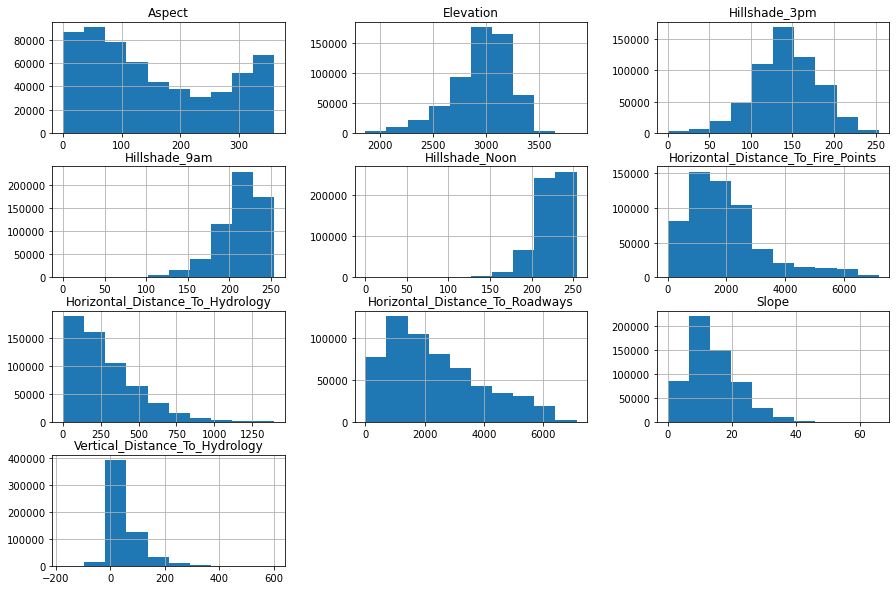

In [12]:
# Create histograms for feature sets
df_FOREST_featureSetTrain.hist(figsize=(15, 10))
plt.show()

From these histograms, we see a few interesting observations. First, the elevation varies between 2000 and 3500 meters. Secondly, the majority of the forest cover is less than 750 meters from bodies of water and less than 6000 meters from roadways.

These observations would appear to indicate that areas that might be fire-prone are not easily road accessible but would need to be addressed by airplane or 'hot-shot' crews that are dropped in by helicopter.

Now let's make some boxplots for each of these features.

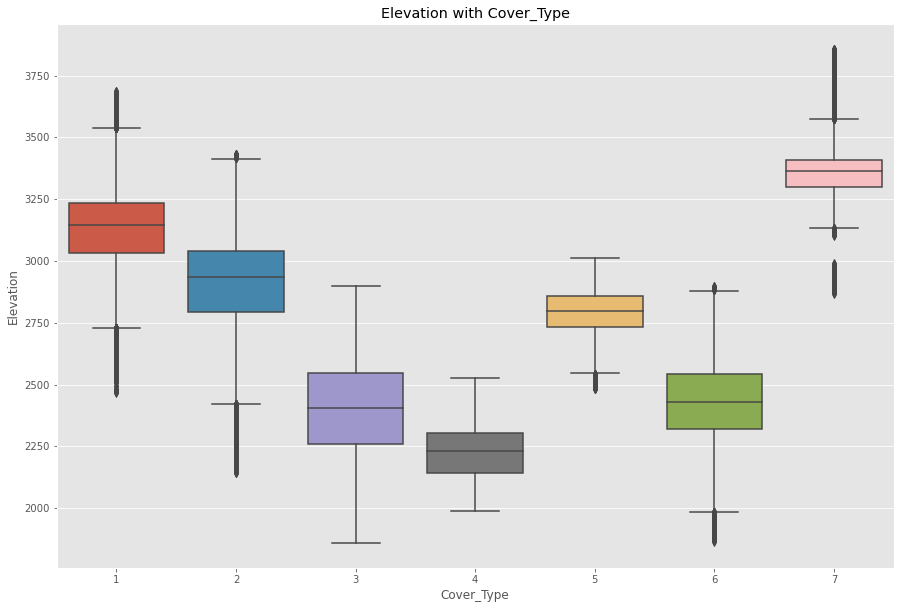

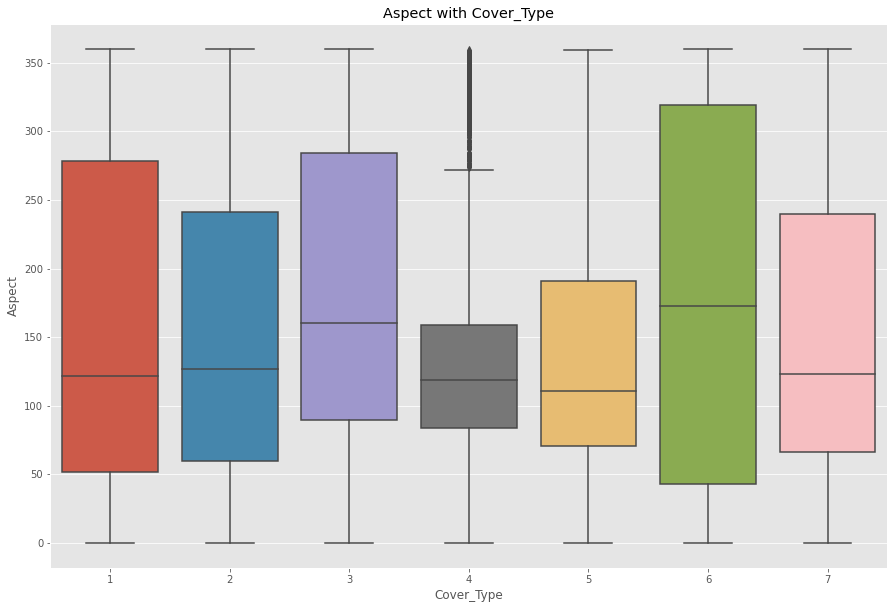

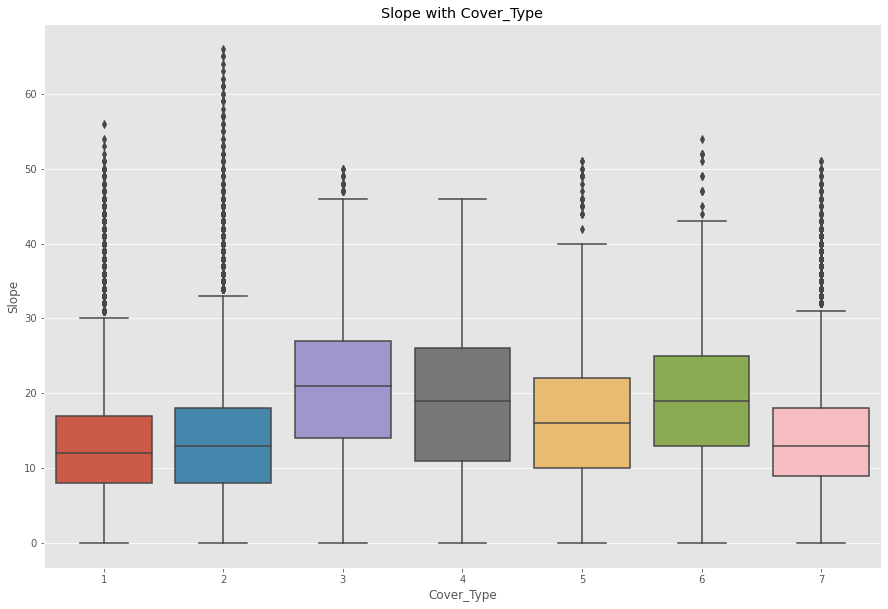

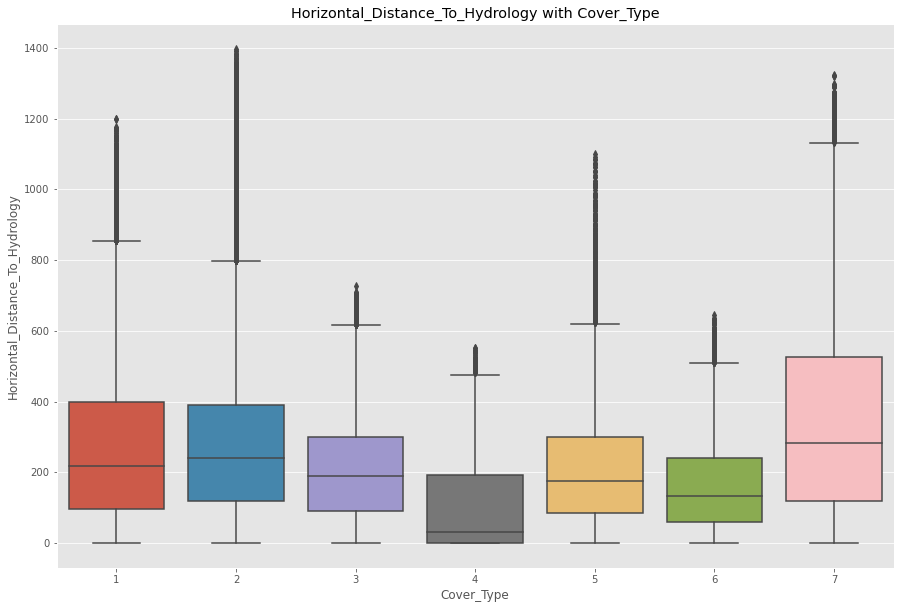

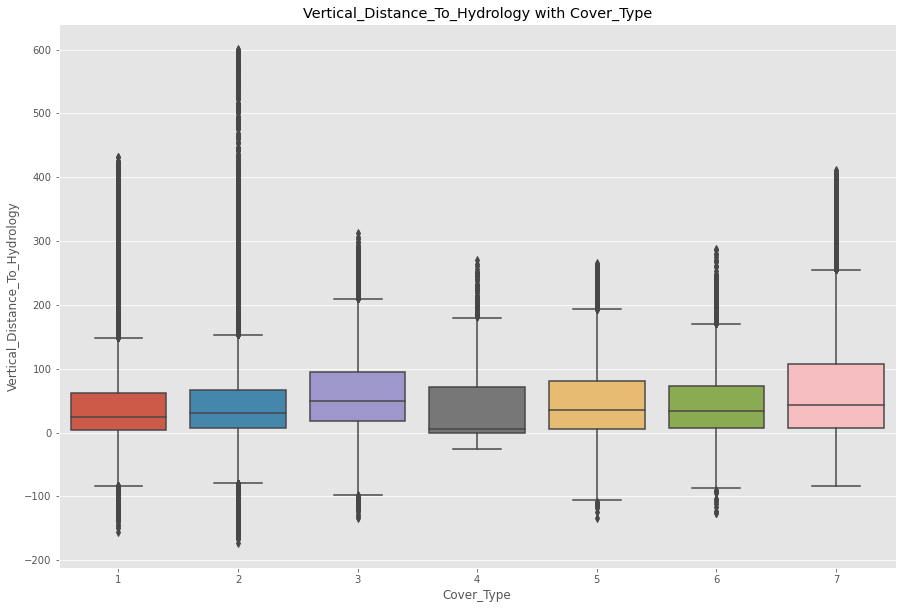

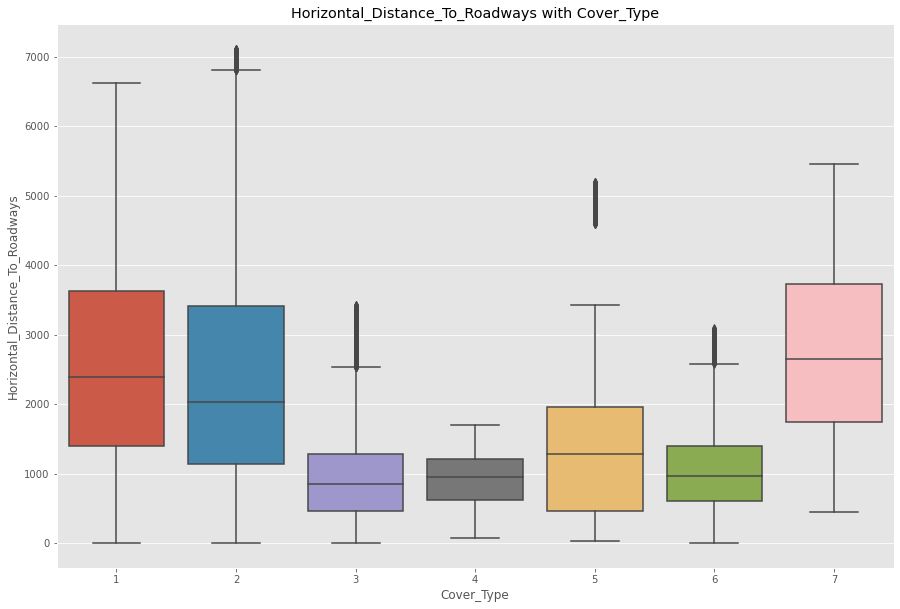

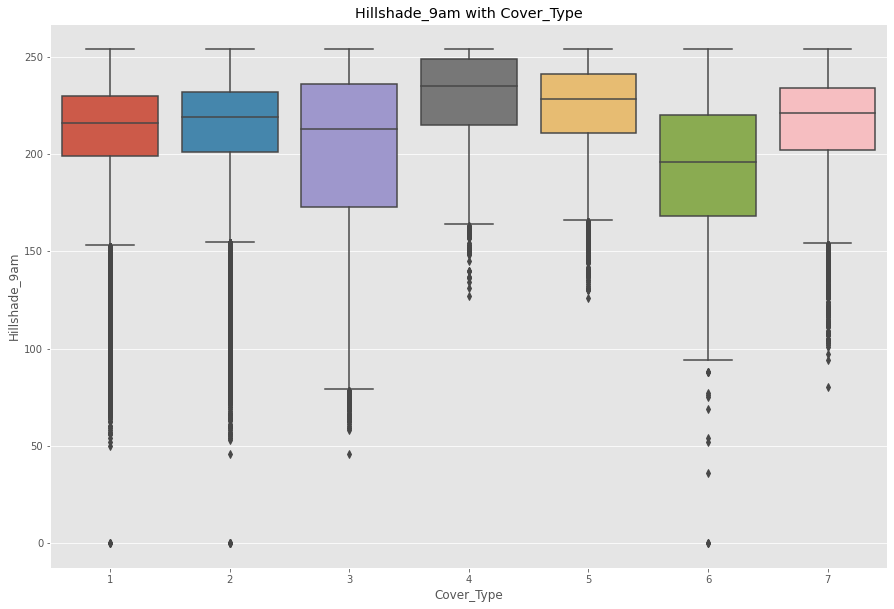

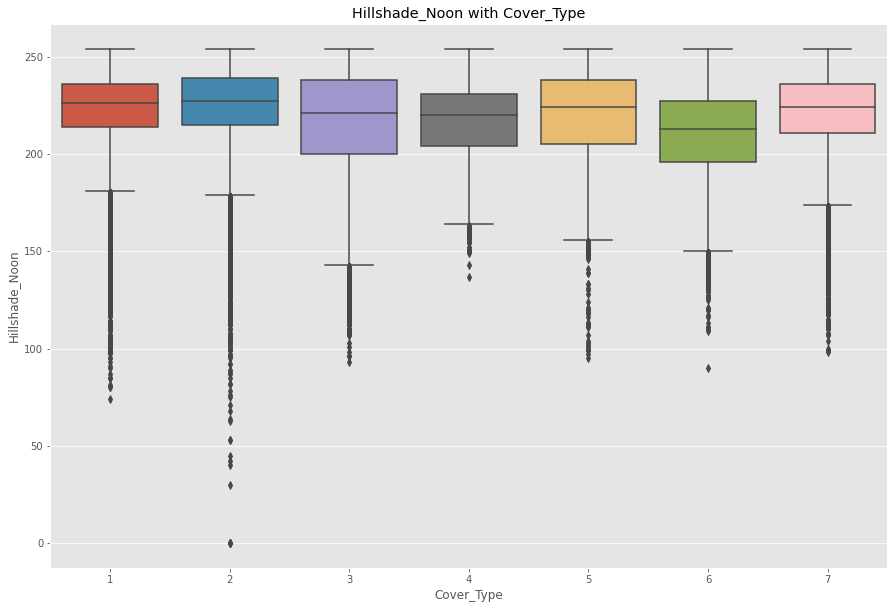

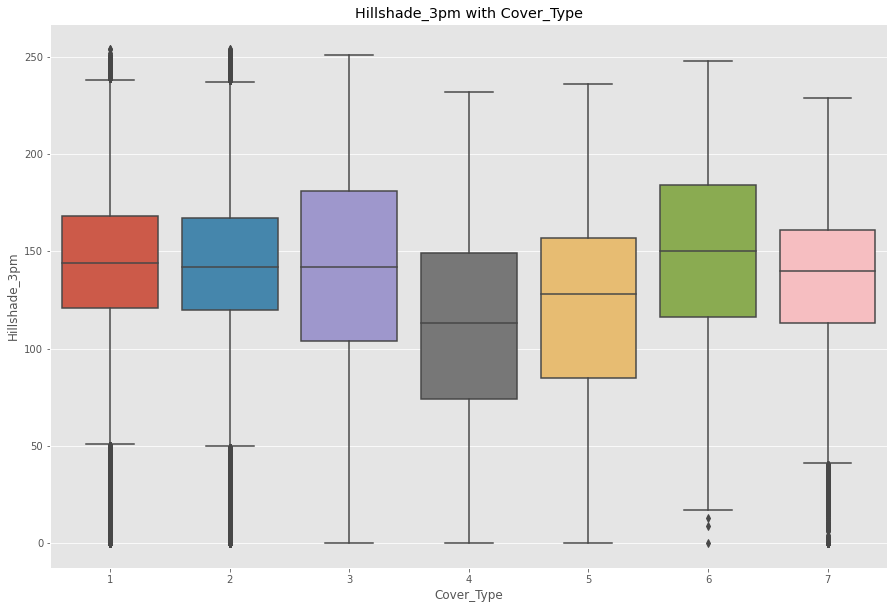

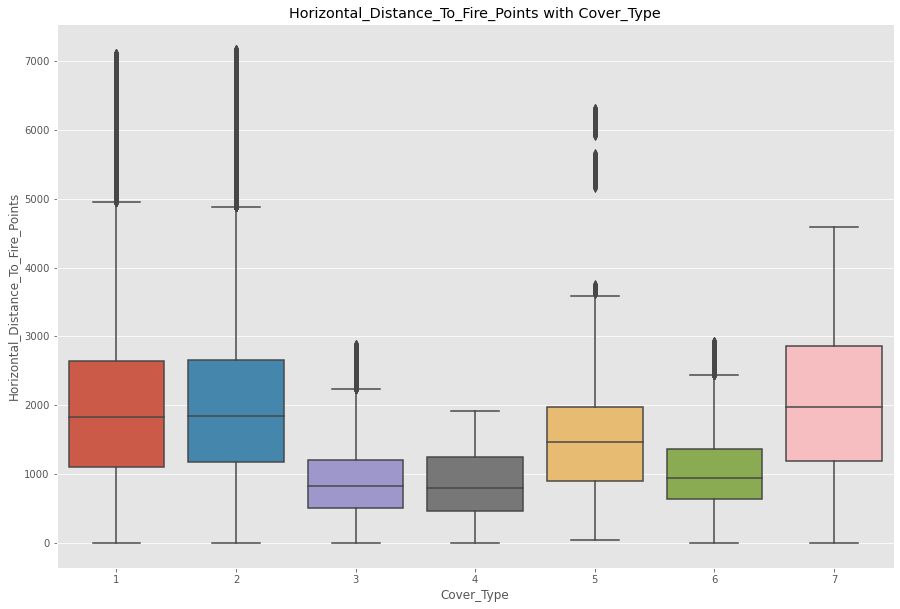

In [13]:
# Create boxplots for feature sets
plt.style.use('ggplot')
for i in df_FOREST_featureSet:
    plt.figure(figsize=(15, 10))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sns.boxplot(x=df_FOREST.Cover_Type, y=df_FOREST_featureSetTrain[i])
    plt.show()

We notice that for the elevation, the cover types vary dramatically, indicating the tree types like different elevations. Moreover, the increased shade at 12pm vs. 9am would appear to indicate these trees are on the eastern sides of mountains. This is further suggested by the face that the hillshades decline at 3pm.

Most importantly, we see that cover types 3, 4 and 6 (Ponderosa Pine, Cottonwood/Willow and Douglas-fir) are the closest to potential fire points. This observations indicates that greater care should be placed in areas where these trees are predominantly located.

With these observations, we will now build a machine learning model to predict where forest fires might occur in this observed area.

## Machine Learning Algorithm

Now let's build a machine learning algorithm to be able to predict for forest fires occur. First, we need to import a few more needed libraries and functions, as well as create the X and Y components for training sets.

In [14]:
# Import Needed Functions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print('Needed functions loaded into workspace!')

Needed functions loaded into workspace!


In [15]:
# Creating X and Y components for training sets
X = df_FOREST.loc[:,'Elevation':'Soil_Type40']
Y = df_FOREST['Cover_Type']

Now let's remove columns with low correlation.

In [16]:
# Define columns to be removed
removed_columns = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15', 'Soil_Type21','Soil_Type25',
                   'Soil_Type28','Soil_Type36','Soil_Type37']

# Remove extra columns
X.drop(removed_columns, axis=1, inplace=True)

C:\Users\jmsie\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now let's create the training and test sets.

In [17]:
# Create Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

Finally, we want to be able to record the results of the different classification algorithms so we can compare them against one another. To accomplish this task, we create a blank variable called 'Comparison'.

In [18]:
# Create holding variable for different classification comparisons
Comparison = []

Now that we have prepped the data for the classification algorithms, let's start using them one-by-one, recording the results in the Comparison variable.

### K-Nearest Neighbor

In [19]:
# Construct the KNN Algorithm
neighbor = np.arange(1,7)
train_accuracy =np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

for i,k in enumerate(neighbor):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    train_accuracy[i] = KNN.score(x_train, y_train)
    test_accuracy[i] = KNN.score(x_test, y_test)

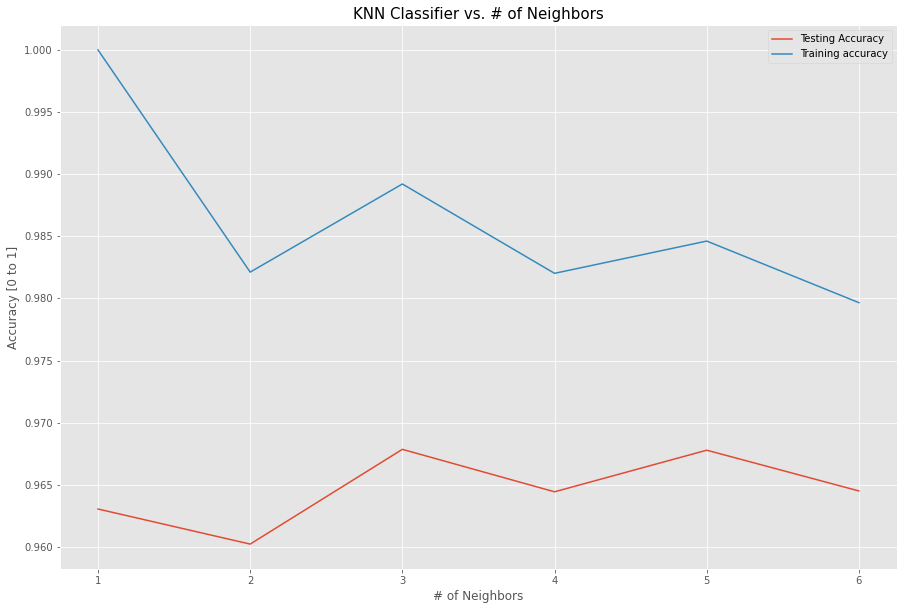

In [20]:
# Plot the KNN Algorithm to determine the needed # of neighbors
plt.figure(figsize=(15,10))
plt.title('KNN Classifier vs. # of Neighbors', fontsize=15)
plt.plot(neighbor, test_accuracy, label='Testing Accuracy')
plt.plot(neighbor, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('# of Neighbors')
plt.ylabel('Accuracy [0 to 1]')
plt.show()

In [21]:
# Enter # of neighbors for highest accuracy level into KNN Algorithm
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Determine KNN Accuracy
KNN_accuracy=KNN.score(x_test,y_test)
Comparison.append(KNN_accuracy)

### Decision Trees

In [23]:
# Using Decision Trees Algorithm
dTree = DecisionTreeClassifier()
dTree.fit(x_train, y_train)
dTree_prediction = dTree.predict(x_test)
dTree_accuracy = accuracy_score(dTree_prediction , y_test)
Comparison.append(dTree_accuracy)

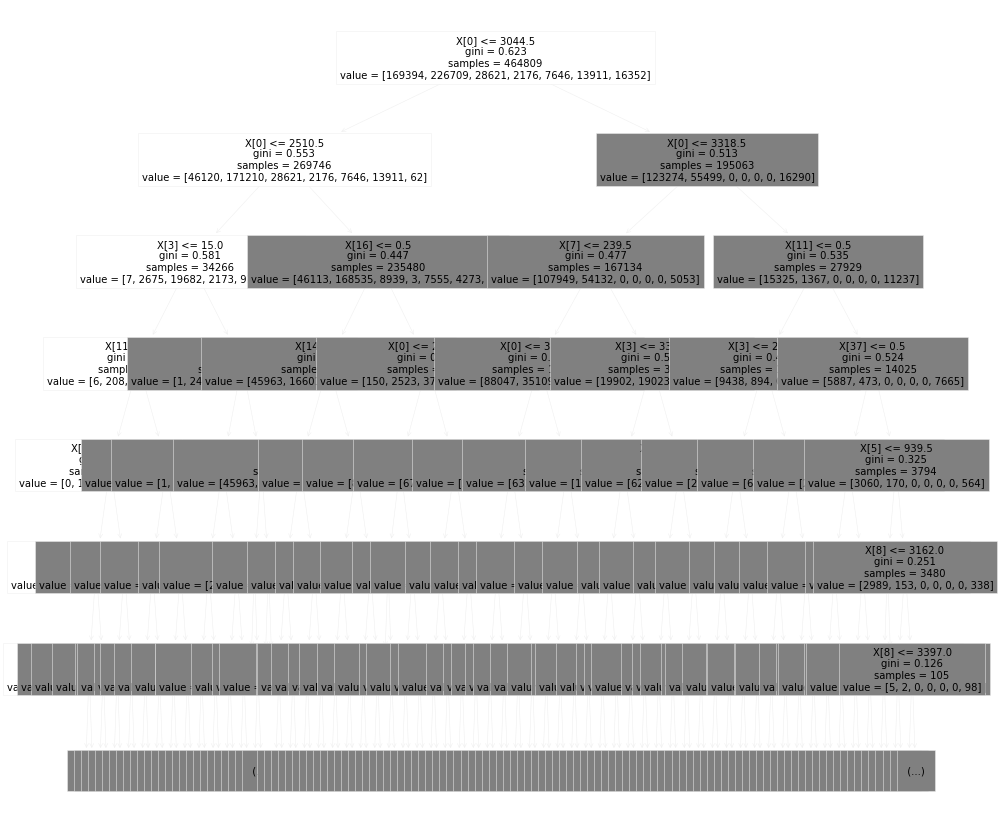

In [24]:
# Plotting Decision Tree Algorithm
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dTree, max_depth=6, fontsize=10)
plt.show()

### Logistic Regression

In [25]:
# Using Logistic Regression Algorithm
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(x_train, y_train)
LR_prediction = LR.predict(x_test)
LR_accuracy = accuracy_score(LR_prediction , y_test)
Comparison.append(LR_accuracy)

### Random Forest

In [26]:
# Using Random Forest Algorithm
rForest = RandomForestClassifier()
rForest.fit(x_train, y_train)
rForest_prediction = rForest.predict(x_test)
rForest_accuracy = accuracy_score(rForest_prediction , y_test)
Comparison.append(rForest_accuracy)

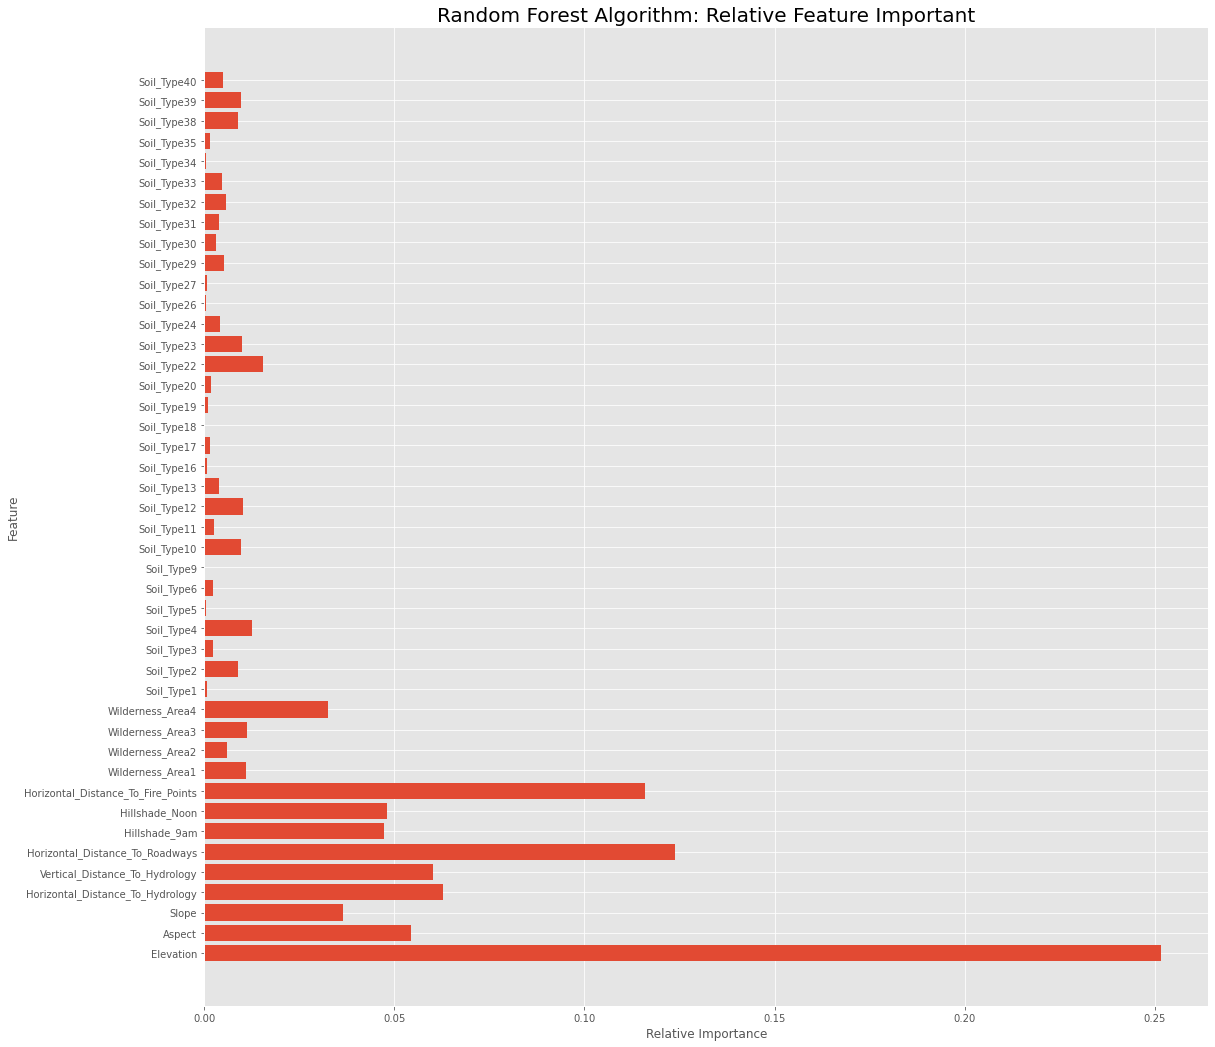

In [27]:
# Plot Random Forest Algorithm
plt.figure(figsize=(18,18))
plt.barh(x_train.columns.values, rForest.feature_importances_)
plt.title('Random Forest Algorithm: Relative Feature Important',fontsize=20)
plt.ylabel('Feature')
plt.xlabel('Relative Importance')
plt.show()

Now that we have run all the algorithms, let's display their respective accuracies.

In [28]:
# Display Accuracy Data for all 4 classification algorithms
# Construct DataFrame
ClassificationAccuracies = pd.DataFrame(data=None,columns=['Accuracy'], index=['Logistic Regression','Decision Trees','Random Forest','K-Nearest Neighbor'])
ClassificationAccuracies['Accuracy'][0] = Comparison[0]
ClassificationAccuracies['Accuracy'][1] = Comparison[1]
ClassificationAccuracies['Accuracy'][2] = Comparison[2]
ClassificationAccuracies['Accuracy'][3] = Comparison[3]

# Display Results
ClassificationAccuracies

,Accuracy
Logistic Regression,0.967858
Decision Trees,0.939494
Random Forest,0.700283
K-Nearest Neighbor,0.958478


As we see from the above table, Logistic Regression is the most accurate classification algorithm for our forest fire predictor model.

## Discussion

In this open-ended project, we were able to show the following:

<ul>
    <li>(1) Aspen trees and Ponderosa pines are the tree-types that are most fire-prone.</li>
    <li>(2) Areas that might be fire-prone are not easily road accessible.</li>
    <li>(3) Logistic Regression provides a 96.7% accuracy score.</li>
</ul>

## Conclusion

The goal of this project was to explore forest cover measurements in Roosevelt National Forest in Colorado and be able to predict where fires are most likely to occur. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!